# Applying the Data Analysis Method to a Research Problem

# 1. Predicting Video Game sales based upon Genre  <a class="anchor" id="Businessunderstanding"></a>


## 1.1. Introduction <a class="anchor" id="Introduction"></a> 

This project investigates the relation between the abstract concept of Genre and the global market performance of a video game. A vast amount of research has been conducted previously exploring the hundreds of different factors pertaining to the success of a video game. The games development industry has become a financial juggernaut since the turn of the millenium, with the U.S industry alone bringing in 43.4 Billion US Dollars in revenue in 2018(Entertainment Software Association | U.S. Economic Growth, 2019). There are vast numbers of developers breaking into the industry every day, and with that, a vast wealth of games to choose from. This means that the ability to quickly predict what games will perform well in such a saturated market would be very useful for developers. Allowing such a prediction to be made based upon Genre alone would give developers a strong starting point when deciding which projects will have resources allocated.

"Consumer Perceptions & Video Game Sales: A Meeting of the Minds" by John Sacranie takes an overarching look at all of the various determinants of video game sales which includes Genre. "Vertical Integration, Exclusivity and Game Sales Performance in the U.S. Video Game Industry" by Gil and Warzynski had a focus on manual regression that was extrmely useful when comparing the results of the findings of this project. Jeffrey Babb and Neil Terry's "Comparing Video Game Sales by Gaming Platform" takes a very direct approach such as that taken here, to see if such a complex issue can be reduced at least in part to one central point. 
    
In this project, a multiple regression model was constructed and applied in an attempt to predict future game sales figures. Certain limits of the research possible were reached during the creation of the project. The singular focus of the question at hand and the focus on categorical data lead to anomolies in the final results, however the findings cannot be discounted. 
 

## 1.2. Background and Literature Review <a class="anchor" id="Background"></a>
There was not a wealth of academic papers and books on this issue. Through extensive online searching utilizing google scholar and mendeley however, small number of relevent and useful texts were discovered.

- "COMPARING VIDEO GAME SALES BY GAMING PLATFORM" by Jeffrey Babb and Neil Terry. This paper includes a similar research question to the one employed by this paper with an adjustment of subject matter. Babb and Terry's research lead them to suggest, as a 'future extension' to their work, a "multiple regression model controlling for platform, genre, ESRB rating, publisher, critical reviews, and other potential determinants." (Babb and Terry, n.d., p.17). Further research into the authors and their works revealed that no such extension was ever produced. This may have been because the two authors were skeptical about the use of regression for their purpose, citing that they were exploring too many factors for a regressive approach to be immediately viable. (Babb and Terry, n.d., p.13)
- "Consumer Perceptions & Video Game Sales: A Meeting of the Minds" by John Sacranie did not have the objective of producing predictions for industry purpose, rather his use of statistics, regression and data was focused towards examining the perceptions of the video game consumer (as the title states). His methods were very useful for the purpose of this paper however. Sacranie used regression extensively throughout his paper, including several factors such as console exclusivity, platform, sequel status and others as well as just genre. He also only used 5 genres for his methods as opposed to the 12 utilized for the purposes of this project (Sacranie and Leekley, n.d., p.15). It must be said, that there are far more genres than even 12, but to qualify each and every one is purely subjective. The twelve provided in the data set utilized for this project are objectively recognized by greater games media.
- "Vertical Integration, Exclusivity and Game Sales Performance in the U.S. Video Game Industry" by Gil and Warzynski focuses exclusively, as the title would suggest, on the United States market. Their paper also features a large focus on the mathematics they utilized to implement their regression formulae. They opted for manual regression, with several equations(Gil and Warzynski, 2009, p.15). There was little of immediate value when auditing this work for the purposes of this project, however some of their extensive results could be used for comparison when considering the viability of predicting game sales based on Genre alone.

 ## 1.3. Methodology/Methods <a class="anchor" id="Methodology/Methods"></a>

The methods utilized when producing this method stems chiefly from the research conducted in the background section of this report. All three of the texts mentioned and named, both in the background section and the bibliography below, all utilized or recommended utilizing linear regression in research such as this. Despite that research being key, it was a natural progression for a report with a goal such as this. Processes such as simple association or KDD / Clustering would not be suitable for this topic as the goal is to predict future sales rather than to compare existing data.

The implimentation of this Regression model started with the vital encoding of the categorical genre data stored in the dataset. The encoding was done with the pandas.get_dummies function. This function created additional columns for each value in the Genres column containing "dummy" values. These values are simple binary indicating if the aligned record is or is not of the represented genre. The encoding of the categorical data allows for it's use in the regression forumlae as strings are not permissable. Several un-needed columns were dropped in the process of cleaning the data, such as the ranking, year, platform and publisher columns. The columns representing the various regions making up the 'Global_Sales' figure were left un-dropped. This was done as a simple column name substitution would need to be made in the model itself to further narrow down the results to represent regions instead of the global market.

The regression model itself is applied by utilizing the statsmodels.formula.api library for python, particularly the OLS library (Ordinary least squares) which estimates unknown parameters in the linear regression model. The testing and training data was composed from the sklearn.model_selection library's train_test_split which was used to divide the testing data and the training data fairly.

# 2. Stage  Two - Data Understanding <a class="anchor" id="Dataunderstanding"></a>
The second stage of the process requires you to acquire the data listed in the project resources. This initial collection includes data loading, if this is necessary for data understanding. For example, if you use a specific tool for data understanding, it makes perfect sense to load your data into this tool. If you acquire multiple data sources then you need to consider how and when you're going to integrate these.

## 2.1 Initial Data Report <a class="anchor" id="Datareport"></a>
This dataset was taken from Kaggle user Gregory Smith, who scraped the data from http://www.vgchartz.com/
The link to this data set is as follows: https://www.kaggle.com/gregorut/videogamesales/data

The truth and validity of the data from 'vgchartz' cannot be immediately varified, however their use of this data is purely educational.

In [34]:
# Import Libraries Required
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [35]:
#Data source: 
#Source Query location: 
path = 'vgsales.csv'
# reads the data from the file - denotes as CSV, it has no header, sets column headers
df =  pd.read_csv(path, sep=',') 

## 2.2 Describe Data <a class="anchor" id="Describedata"></a>
Data description report - Describe the data that has been acquired including its format, its quantity (for example, the number of records and fields in each table), the identities of the fields and any other surface features which have been discovered. Evaluate whether the data acquired satisfies your requirements.

In [36]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [37]:
df.shape


(16598, 11)

In [38]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [39]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [41]:
df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## 2.3 Verify Data Quality <a class="anchor" id="Verifydataquality"></a>

Examine the quality of the data, addressing questions such as:

- Is the data complete (does it cover all the cases required)?
- Is it correct, or does it contain errors and, if there are errors, how common are they?
- Are there missing values in the data? If so, how are they represented, where do they occur, and how common are they?

### 2.3.1. Missing Data <a class="anchor" id="MissingData"></a>
In addition to incorrect datatypes, another common problem when dealing with real-world data is missing values. These can arise for many reasons and have to be either filled in or removed before we train a machine learning model. First, let’s get a sense of how many missing values are in each column 

While we always want to be careful about removing information, if a column has a high percentage of missing values, then it probably will not be useful to our model. The threshold for removing columns should depend on the problem

In [42]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [43]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [44]:
missing_values_table(df)

Your selected dataframe has 11 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
Year,271,1.6
Publisher,58,0.3


In [45]:
# Get the columns with > 50% missing
missing_df = missing_values_table(df);
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
print('We will remove %d columns.' % len(missing_columns))

Your selected dataframe has 11 columns.
There are 2 columns that have missing values.
We will remove 0 columns.


In [46]:
# Drop the columns
df = df.drop(list(missing_columns))

## 2.4 Initial Data Exploration  <a class="anchor" id="Exploredata"></a>
During this stage you'll address data mining questions using querying, data visualization and reporting techniques. These ***may*** include:

- **Distribution** of key attributes (for example, the target attribute of a prediction task)
- **Relationships** between pairs or small numbers of attributes
- Results of **simple aggregations**
- **Properties** of significant sub-populations
- **Simple** statistical analyses

These analyses may directly address your data mining goals. They may also contribute to or refine the data description and quality reports, and feed into the transformation and other data preparation steps needed for further analysis. 

- **Data exploration report** - Describe results of your data exploration, including first findings or initial hypothesis and their impact on the remainder of the project. If appropriate you could include graphs and plots here to indicate data characteristics that suggest further examination of interesting data subsets.

### 2.4.1 Distributions  <a class="anchor" id="Distributions"></a>

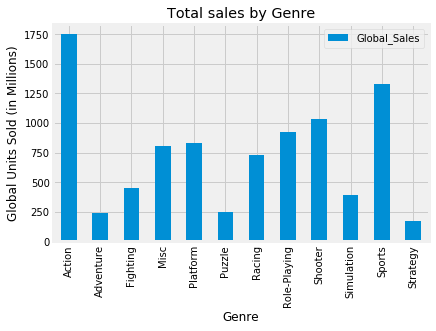

In [47]:
aggregateDF = df.groupby('Genre').agg({'Global_Sales': np.sum})
aggregateDF.plot.bar()
plt.title('Total sales by Genre')
plt.ylabel('Global Units Sold (in Millions)')
plt.show()

## 2.5 Data Quality Report <a class="anchor" id="Dataqualityreport"></a>
List the results of the data quality verification. If quality problems exist, suggest possible solutions. Solutions to data quality problems generally depend heavily on both data and business knowledge.

#### Missing Values

Only two columns contained any missing values. The year column has a total of 271 missing values, which makes up 1.6 percent of the total values contained within the year column. The publisher column contained 58 missing values, which makes up 0.3 percent of the total values of the publisher column. These missing values were well within acceptable bounds for missing information. A simple median value for year may have been applied as the years are stored as floats. The publisher may have just been adjusted into an "other", or "not_listed" default value.

#### Incorrect Data Types

The year column was stored as type float. Years are traditionally stored as categorical data, due to the fact that years in the archival sense are rarely used for aggregate functions.


# 3. Stage Three - Data Preperation <a class="anchor" id="Datapreperation"></a>
This is the stage of the project where you decide on the data that you're going to use for analysis. The criteria you might use to make this decision include the relevance of the data to your data mining goals, the quality of the data, and also technical constraints such as limits on data volume or data types. Note that data selection covers selection of attributes (columns) as well as selection of records (rows) in a table.

## 3.1 Select Your Data <a class="anchor" id="Selectyourdata"></a>
This is the stage of the project where you decide on the data that you're going to use for analysis. The criteria you might use to make this decision include the relevance of the data to your data mining goals, the quality of the data, and also technical constraints such as limits on data volume or data types. Note that data selection covers selection of attributes (columns) as well as selection of records (rows) in a table.

Rationale for inclusion/exclusion - List the data to be included/excluded and the reasons for these decisions.

#### Columns
The only columns relevant to the research topic of this report were Name (for listing purposes), Genre and Global_Sales. As mentioned above, the sales for each independent region (NA_Sales, EU_Sales, JP_Sales and Other_Sales) were left undropped. A simple function could be added as an extension to this project that would analyze the monetary potential for genres within specific regions. Ranking, Publisher, Platform and Year were all dropped as they hold no relevance, or potential relevance, to the subject matter at hand. 

## 3.2 Clean The Data <a class="anchor" id="Cleansethedata"></a>
This task involves raise the data quality to the level required by the analysis techniques that you've selected. This may involve selecting clean subsets of the data, the insertion of suitable defaults, or more ambitious techniques such as the estimation of missing data by modelling.

### 3.2.1 Label Encoding <a class="anchor" id="labelEncoding"></a>
Label Encoding to turn Categorical values to Integers

An approach to encoding categorical values is to use a technique called label encoding. Label encoding is simply converting each value in a column to a number. For example, the body_style column contains 5 different values. We could choose to encode it like this:

convertible -> 0
hardtop -> 1
hatchback -> 2
sedan -> 3
wagon -> 4
http://pbpython.com/categorical-encoding.html

In [48]:
#dfAfterEnc represents the data frame after encoding, 
dfAfterEnc = pd.get_dummies(df, columns=["Genre"])

In [49]:
dfAfterEnc.head()

,Rank,Name,Platform,Year,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,...,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,1,Wii Sports,Wii,2006.0,Nintendo,41.49,29.02,3.77,8.46,82.74,...,0,0,0,0,0,0,0,0,1,0
1,2,Super Mario Bros.,NES,1985.0,Nintendo,29.08,3.58,6.81,0.77,40.24,...,0,0,1,0,0,0,0,0,0,0
2,3,Mario Kart Wii,Wii,2008.0,Nintendo,15.85,12.88,3.79,3.31,35.82,...,0,0,0,0,1,0,0,0,0,0
3,4,Wii Sports Resort,Wii,2009.0,Nintendo,15.75,11.01,3.28,2.96,33.00,...,0,0,0,0,0,0,0,0,1,0
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Nintendo,11.27,8.89,10.22,1.00,31.37,...,0,0,0,0,0,1,0,0,0,0


### 3.2.2 Drop Unnecessary Columns <a class="anchor" id="DropCols"></a>
Sometimes we may not need certain columns. We can drop to keep only relevent data

In [50]:
#del_col_list = ['col1', 'col2']
##df = df.drop(del_col_list, axis=1)
#df.head()

#Removing platform, rank, publisher and year because it has no relevence to the research question
del_col_list = ['Platform', 'Rank', 'Publisher', 'Year']
cleanDF = dfAfterEnc.drop(del_col_list, axis = 1)
cleanDF.head()

,Name,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,Wii Sports,41.49,29.02,3.77,8.46,82.74,0,0,0,0,0,0,0,0,0,0,1,0
1,Super Mario Bros.,29.08,3.58,6.81,0.77,40.24,0,0,0,0,1,0,0,0,0,0,0,0
2,Mario Kart Wii,15.85,12.88,3.79,3.31,35.82,0,0,0,0,0,0,1,0,0,0,0,0
3,Wii Sports Resort,15.75,11.01,3.28,2.96,33.00,0,0,0,0,0,0,0,0,0,0,1,0
4,Pokemon Red/Pokemon Blue,11.27,8.89,10.22,1.00,31.37,0,0,0,0,0,0,0,1,0,0,0,0


## 3.5 Primary Data Set  <a class="anchor" id="Primary Data Set"></a>
Construct Our Primary Data Set, this is the pre-processed data set that will be used for the data modeling experiments.

In [52]:
#Composition of Test and Training data for use during Model verification
from sklearn.model_selection import train_test_split
y = cleanDF['Global_Sales']
x = cleanDF
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.33, random_state = 42)

#primaryDF is composed of the final adjusted dataframe from the previous section.
primaryDF = cleanDF


# 4. Modelling <a class="anchor" id="Modelling"></a>
As the first step in modelling, you'll select the actual modelling technique that you'll be using. Although you may have already selected a tool during the business understanding phase, at this stage you'll be selecting the specific modelling technique e.g. Association Rules with Apriori,  decision-tree building with C5.0, Clustering with K-Meand or neural network generation with back propagation. If multiple techniques are applied, perform this task separately for each technique.



## 4.1. Modelling technique <a class="anchor" id="ModellingTechnique"></a>
Document the actual modelling technique that is to be used.

Multiple Linear Regression - Utilized to predict global sales via genre as discussed in the methodology section

Import Models below:

In [53]:
import statsmodels.formula.api as smf

## 4.2. Modelling assumptions <a class="anchor" id="ModellingAssumptions"></a>
Many modelling techniques make specific assumptions about the data, for example that all attributes have uniform distributions, no missing values allowed, class attribute must be symbolic etc. Record any assumptions made.

- Columns used have no missing data (Numerical Data may have a default value)
- Genre column has been encoded


## 5.3. Build Model <a class="anchor" id="BuildModel"></a>
Run the modelling tool on the prepared dataset to create one or more models.

**Parameter settings** - With any modelling tool there are often a large number of parameters that can be adjusted. List the parameters and their chosen values, along with the rationale for the choice of parameter settings.

**Models** - These are the actual models produced by the modelling tool, not a report on the models.

**Model descriptions** - Describe the resulting models, report on the interpretation of the models and document any difficulties encountered with their meanings.

In [54]:
multipleReg1 = smf.ols(formula='Global_Sales~C(Genre_Sports)', data=primaryDF).fit()
multipleReg1.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.009
Date:                Fri, 06 Dec 2019   Prob (F-statistic):              0.315
Time:                        20:47:12   Log-Likelihood:                -30878.
No. Observations:               16598   AIC:                         6.176e+04
Df Residuals:                   16596   BIC:                         6.178e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.5325      0.013     40.883      0.000       0.507       0.558
C(Genre_Sports)[T.1]     0.0348      0.035      1.004      0.315      -0.033       0.103
==============================================================================
Omnibus:                    34430.086   Durbin-Watson:                   0.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        252438271.988
Skew:                          17.393   Prob(JB):                         0.00
Kurtosis:                     606.162   Cond. No.                         2.94
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
#Everywhere in the prediction chart that 0.567319 appears, the genre is sports.
#Non sports games are marked as 0.532522
sales_pred1 = multipleReg1.predict(primaryDF['Genre_Sports'])
sales_pred1.head(20)

0     0.567319
1     0.532522
2     0.532522
3     0.567319
4     0.532522
5     0.532522
6     0.532522
7     0.532522
8     0.532522
9     0.532522
10    0.532522
11    0.532522
12    0.532522
13    0.567319
14    0.567319
15    0.532522
16    0.532522
17    0.532522
18    0.532522
19    0.532522
dtype: float64

In [56]:
multipleReg2 = smf.ols(formula='Global_Sales~C(Genre_Platform)', data=primaryDF).fit()
multipleReg2.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     62.44
Date:                Fri, 06 Dec 2019   Prob (F-statistic):           2.92e-15
Time:                        20:47:20   Log-Likelihood:                -30848.
No. Observations:               16598   AIC:                         6.170e+04
Df Residuals:                   16596   BIC:                         6.172e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.5148      0.012     41.576      0.000       0.491       0.539
C(Genre_Platform)[T.1]     0.4235      0.054      7.902      0.000       0.318       0.529
==============================================================================
Omnibus:                    34456.021   Durbin-Watson:                   0.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        255599668.082
Skew:                          17.419   Prob(JB):                         0.00
Kurtosis:                     609.937   Cond. No.                         4.46
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
#Everywhere in the prediction chart that 0.938341 appears, the genre is Platforming.
#Non platforming games are predicted as 0.514834
sales_pred2 = multipleReg2.predict(primaryDF['Genre_Platform'])
sales_pred2.head(20)

0     0.514834
1     0.938341
2     0.514834
3     0.514834
4     0.514834
5     0.514834
6     0.938341
7     0.514834
8     0.938341
9     0.514834
10    0.514834
11    0.514834
12    0.514834
13    0.514834
14    0.514834
15    0.514834
16    0.514834
17    0.514834
18    0.938341
19    0.514834
dtype: float64

In [58]:
multipleReg3 = smf.ols(formula='Global_Sales~C(Genre_Platform) + C(Genre_Racing)', data=primaryDF).fit()
multipleReg3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     32.65
Date:                Fri, 06 Dec 2019   Prob (F-statistic):           7.02e-15
Time:                        20:47:26   Log-Likelihood:                -30846.
No. Observations:               16598   AIC:                         6.170e+04
Df Residuals:                   16595   BIC:                         6.172e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.5087      0.013     39.415      0.000       0.483       0.534
C(Genre_Platform)[T.1]     0.4297      0.054      7.999      0.000       0.324       0.535
C(Genre_Racing)[T.1]       0.0774      0.046      1.691      0.091      -0.012       0.167
==============================================================================
Omnibus:                    34457.711   Durbin-Watson:                   0.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        255795432.000
Skew:                          17.421   Prob(JB):                         0.00
Kurtosis:                     610.170   Cond. No.                         4.52
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
#Everywhere in the prediction chart that 0.938341 appears, the genre is Platforming
#Everywhere in the prediction chart that 0.585101 appears, the genre is Racing
#Non Platforming or Racing games are marked as 0.532522
sales_pred3 = multipleReg3.predict(primaryDF[['Genre_Platform', 'Genre_Racing']])
sales_pred3.head(20)

0     0.508679
1     0.938341
2     0.586101
3     0.508679
4     0.508679
5     0.508679
6     0.938341
7     0.508679
8     0.938341
9     0.508679
10    0.508679
11    0.586101
12    0.508679
13    0.508679
14    0.508679
15    0.508679
16    0.508679
17    0.508679
18    0.938341
19    0.508679
dtype: float64

In [60]:
multipleReg4 = smf.ols(formula='Global_Sales~C(Genre_Sports) + C(Genre_Platform) + C(Genre_Racing) + C(Genre_Puzzle) + C(Genre_Simulation) + C(Genre_Shooter) + C(Genre_Action) + C(Genre_Fighting) + C(Genre_Misc) + C(Genre_Strategy) + C(Genre_Adventure)', data=primaryDF).fit()
multipleReg4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     18.22
Date:                Fri, 06 Dec 2019   Prob (F-statistic):           1.06e-36
Time:                        20:47:29   Log-Likelihood:                -30779.
No. Observations:               16598   AIC:                         6.158e+04
Df Residuals:                   16586   BIC:                         6.168e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.6232      0.040     15.548      0.000       0.545       0.702
C(Genre_Sports)[T.1]        -0.0559      0.051     -1.091      0.275      -0.156       0.045
C(Genre_Platform)[T.1]       0.3151      0.066      4.802      0.000       0.186       0.444
C(Genre_Racing)[T.1]        -0.0371      0.059     -0.626      0.531      -0.153       0.079
C(Genre_Puzzle)[T.1]        -0.2024      0.076     -2.677      0.007      -0.351      -0.054
C(Genre_Simulation)[T.1]    -0.1709      0.066     -2.586      0.010      -0.300      -0.041
C(Genre_Shooter)[T.1]        0.1687      0.059      2.879      0.004       0.054       0.283
C(Genre_Action)[T.1]        -0.0951      0.048     -1.972      0.049      -0.190      -0.001
C(Genre_Fighting)[T.1]      -0.0939      0.067     -1.411      0.158      -0.224       0.037
C(Genre_Misc)[T.1]          -0.1575      0.055     -2.884      0.004      -0.264      -0.050
C(Genre_Strategy)[T.1]      -0.3661      0.072     -5.117      0.000      -0.506      -0.226
C(Genre_Adventure)[T.1]     -0.4374      0.059     -7.429      0.000      -0.553      -0.322
==============================================================================
Omnibus:                    34561.613   Durbin-Watson:                   0.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        262319759.695
Skew:                          17.538   Prob(JB):                         0.00
Kurtosis:                     617.876   Cond. No.                         12.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
sales_pred4 = multipleReg4.predict(primaryDF[['Genre_Sports','Genre_Platform', 'Genre_Racing', 'Genre_Puzzle', 'Genre_Simulation', 'Genre_Shooter','Genre_Action','Genre_Fighting', 'Genre_Misc', 'Genre_Strategy', 'Genre_Adventure']])
sales_pred4.head(20)

0     0.567319
1     0.938341
2     0.586101
3     0.567319
4     0.623233
5     0.420876
6     0.938341
7     0.465762
8     0.938341
9     0.791885
10    0.452364
11    0.586101
12    0.623233
13    0.567319
14    0.567319
15    0.465762
16    0.528100
17    0.528100
18    0.938341
19    0.465762
dtype: float64

### Validating Model

In [65]:
#Validating the model using the training and testing data composed earlier
validRegr = smf.ols(formula='Global_Sales~C(Genre_Platform) + C(Genre_Racing)', data=xtrain).fit()

In [66]:
validPred = validRegr.predict(xtest[['Genre_Platform','Genre_Racing']])


## 6. Results/Data/Findings <a class="anchor" id="Results"></a>


In [69]:
#validRegr represents the validation of the Regression model used which used the Testing Data and Training Data composed earlier
validRegr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     31.20
Date:                Fri, 06 Dec 2019   Prob (F-statistic):           3.07e-14
Time:                        21:31:30   Log-Likelihood:                -19873.
No. Observations:               11120   AIC:                         3.975e+04
Df Residuals:                   11117   BIC:                         3.977e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.4975      0.015     33.883      0.000       0.469       0.526
C(Genre_Platform)[T.1]     0.4628      0.061      7.593      0.000       0.343       0.582
C(Genre_Racing)[T.1]       0.1402      0.052      2.688      0.007       0.038       0.242
==============================================================================
Omnibus:                    18870.294   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         19950225.749
Skew:                          11.647   Prob(JB):                         0.00
Kurtosis:                     209.193   Cond. No.                         4.50
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
#The first 20 values of the prediction table
validPred.head(20)

8928     0.637758
4789     0.497535
15492    0.497535
14767    0.497535
5211     0.497535
720      0.960352
4918     0.497535
3107     0.497535
7416     0.497535
4447     0.497535
2157     0.497535
10762    0.497535
12217    0.497535
3421     0.497535
11598    0.497535
6945     0.637758
9613     0.960352
14478    0.497535
10390    0.497535
11298    0.637758
dtype: float64

# 6. Discussion <a class="anchor" id="Discussion"></a>	




The goal of this report was to qualify the possibility that one could conclude an approximate prediction of a video game's potential sales based solely upon that game's genre. The conclusion I have come to is that genre alone is not sufficient for such a purpose. This analysis is drawn from the model created above.

The results presented were different from initial expectations. They were surprisingly binary in nature, that is every prediction for every game in the testing data set was given the same projected sales number for it's corresponding genre. Initially I believed this was due to over-fitting, however upon a closer analysis it only made sense that the calculations, drawing from the regression of one contiguous sales format, would come to the same prediction for each new entry into that bracket.

When compared with the results from the texts presented in the literature review, particularly in (Sacranie and Leekley, n.d., p.19), the results of the above model showed a much lower Adjusted R2 value (0.05 above to 0.122 in Sacranie's work) as well as a much more carefully adjusted F-Statistic for each category. This indicates a poor selection of variables on which the prediction can act and thus explains the poor quality of the given results.

##### Solutions
- A broader research question: Encapsulating year or developer as well to broaden the selection of variables the regression formula has to work on.
- Diversifying genres to allow a game to have more than one genre: Expanding the selection of variables. Allowing a game to be both shooter AND simulation as we see in many military simulation games today, or platforming AND adventure which is a popular combination in the industry, could result in more substantial and individual results.
- Improved implementation : The model above produced unusual and insubstantial results, but the few results given did correlate with my own expectations for the given genres based upon personal domain knowledge and the sales bar chart given above. This leads me to believe that improvements to the implementation of the model could see regression as a good fit for this category of data analytics.

The discovery techniques could be considered successful as they lead me to several conclusions and a proper understanding of why the ultimate, overall application of the modelling failed. In a business context, this system may be useful very one dimensionally, as it would succesfully predict based on genre one singular release based upon each genre.


# 7. Conclusion <a class="anchor" id="Conclusion"></a>

In summation, it is extremely challenging yet not impossible to dictate the potential success of a video game based upon Genre alone. Further research into the possibility could be performed with methods other than Regression, or by utilizing one of the aforementioned solutions from the discussion section. Further improvements could be made on the model by allowing a narrower field for independent regions, such as North America or Europe, instead of exclusively relying on the Global sales statistic.

# 8. Reference List/Bibliography <a class="anchor" id="Reference"></a>

Anon 2019. Entertainment Software Association | U.S. Economic Growth. [online] Available at: <https://www.theesa.com/industry/economic-growth/> [Accessed 6 Dec. 2019].
Babb, J., n.d. COMPARING VIDEO GAME SALES BY GAMING PLATFORM.
Gil, R. and Warzynski, 2009. Munich Personal RePEc Archive Vertical Integration, Exclusivity and Game Sales Performance in the U.S. Video Game Industry.
Sacranie, J. and Leekley, R., n.d. Consumer Perceptions & Video Game Sales: A Meeting of the Minds" (2010). Honors Projects. [online] Available at: <http://digitalcommons.iwu.edu/econ_honproj/108> [Accessed 6 Dec. 2019].



# 9. Other Resources and Acknowledgements

DataSet : https://www.kaggle.com/gregorut/videogamesales/data

Further (online) information sources :

Taken from Regression Section of course content.

Information on pandas.get_dummies() - https://stackoverflow.com/questions/50733014/linear-regression-with-dummy-categorical-variables
